### Dataset de Prueba

In [1]:
df <- data.frame(
  x1 = c(5, -1, 1, -3),
  x2 = c(3,  1, -2, -2),
  row.names = c("A", "B", "C", "D")
)

# df

In [2]:
set.seed(123)  # para reproducibilidad

km2 <- kmeans(df, centers = 2, nstart = 20)  

km2

K-means clustering with 2 clusters of sizes 1, 3

Cluster means:
  x1 x2
1  5  3
2 -1 -1

Clustering vector:
A B C D 
1 2 2 2 

Within cluster sum of squares by cluster:
[1]  0 14
 (between_SS / total_SS =  73.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [3]:
data.frame(
    Item=rownames(df),
    x1 = df$x1,
    x2 = df$x2,
    cluster = km2$cluster
)

cols <- c("steelblue","tomato")[km2$cluster]

,Item,x1,x2,cluster
,<chr>,<dbl>,<dbl>,<int>
A,A,5,3,1
B,B,-1,1,2
C,C,1,-2,2
D,D,-3,-2,2


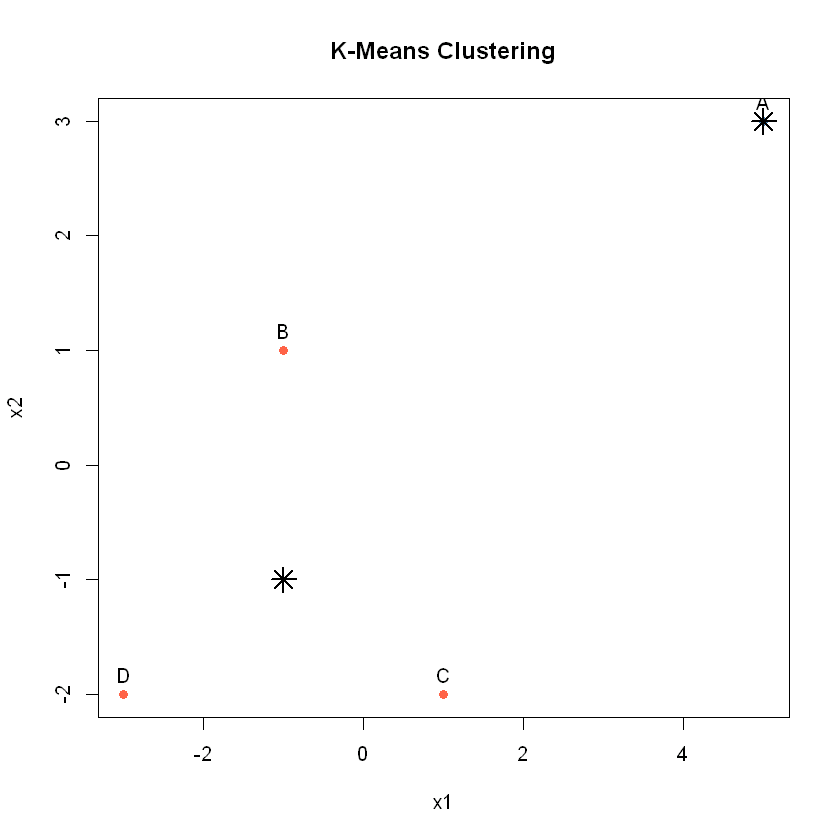

In [4]:
plot(
    df$x1,df$x2,
    col=cols,pch=19,
    xlab="x1",ylab="x2",
    main="K-Means Clustering"
)
text(df$x1,df$x2,labels=rownames(df),pos=3)
points(
    km2$centers[,1],km2$centers[,2],
    pch=8, cex=2, lwd=2
)

In [5]:
library(ggplot2)
library(factoextra)

fviz_cluster(
  km2, 
  data = df, #df_named
  repel = TRUE,
  labelsize = 6,
  main = "Clusters k-means con etiquetas"
) 

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Warning message:
"package 'factoextra' was built under R version 4.4.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

ERROR while rich displaying an object: Error in gg_par(col = alpha(data$colour %||% data$fill %||% "black", data$alpha), : could not find function "gg_par"

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCalli

### Dataset 

In [1]:
library(ggplot2)
library(factoextra)

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Warning message:
"package 'factoextra' was built under R version 4.4.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
data("USArrests") 
df <- scale(USArrests)
# df

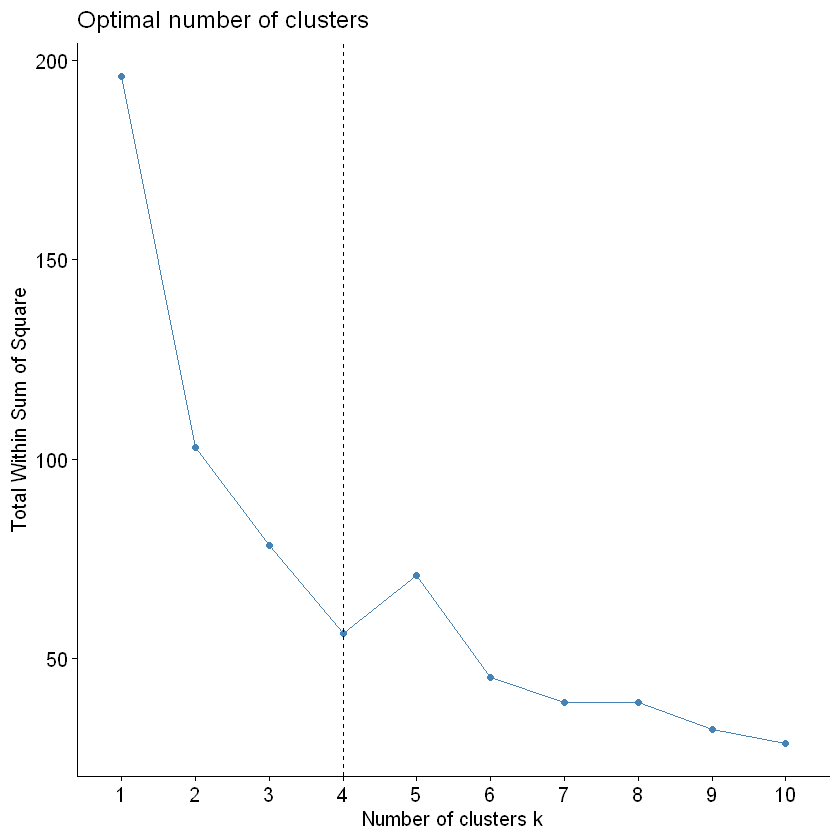

In [3]:
fviz_nbclust(df, kmeans, method = "wss") + 
geom_vline(xintercept = 4, linetype = 2)

In [4]:
set.seed(123)
km.res <- kmeans(df, 4, nstart = 25)

km.res

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

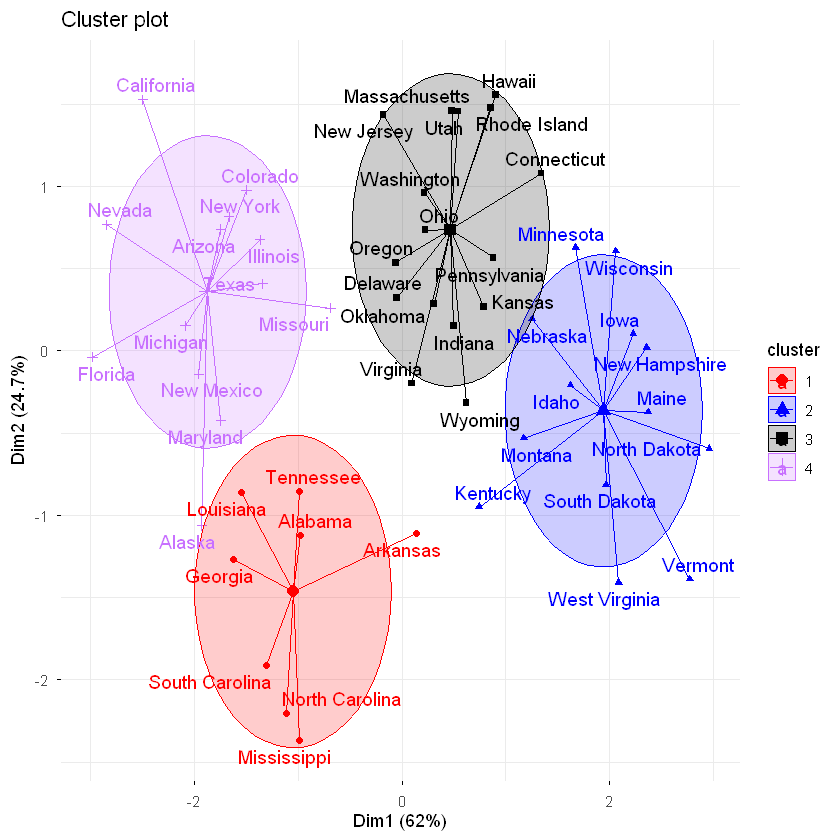

In [ ]:
fviz_cluster(km.res, data = df,
             palette = c("#FF0000", "#0000FF", "#000000", "#C870FF"),
             ellipse.type = "euclid",
             star.plot = TRUE,
             repel = TRUE,
             ggtheme = theme_minimal())